# EDA

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
# Reading in the data
df = pd.read_csv('../data/genre_clean.csv')

In [3]:
# Taking a look at the data
df.head()

files  zero_crossing_rate  spectral_centroid  spectral_rolloff  \
0  blues.00000.wav            0.083045        1784.122641       3805.723030   
1  blues.00001.wav            0.056040        1530.261767       3550.713616   
2  blues.00002.wav            0.076291        1552.832481       3042.410115   
3  blues.00003.wav            0.033309        1070.153418       2184.879029   
4  blues.00004.wav            0.101461        1835.128513       3579.957471   

       mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0 -113.598820  121.57067 -19.162262  42.363937  -6.362266  18.621931   
1 -207.523830  123.98514   8.947019  35.867150   2.909594  21.519472   
2  -90.757164  140.44087 -29.084547  31.686693 -13.976547  25.753752   
3 -199.575130  150.08610   5.663404  26.855282   1.770071  14.232647   
4 -160.354170  126.20948 -35.581394  22.139256 -32.473550  10.850701   

      mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11   mfcc_12   mfcc_13  \
0 -13.699734  15.339802 -12.274304  10.970946  -8.326061  8.802088 -3.669941   
1  -8.556514  23.370676 -10.103608  11.899242  -5.558824  5.377876 -2.234492   
2 -13.664990  11.634442 -11.778322   9.714757 -13.125314  5.791247 -8.901967   
3  -4.827845   9.286853  -0.756120   8.134435  -3.200026  6.078081 -2.478445   
4 -23.350070   0.493249 -11.796539   1.203519 -13.084959 -2.810499 -6.934471   

  labels  y  
0  blues  1  
1  blues  1  
2  blues  1  
3  blues  1  
4  blues  1

In [4]:
# Looking at some descriptive statistics
df.describe()

zero_crossing_rate  spectral_centroid  spectral_rolloff       mfcc_1  \
count         1000.000000        1000.000000       1000.000000  1000.000000   
mean             0.103612        2201.887215       4571.806734  -144.497318   
std              0.041821         715.916104       1574.668249   100.218716   
min              0.021697         570.349904        749.740169  -552.158600   
25%              0.070244        1627.911508       3380.327774  -200.773685   
50%              0.099503        2209.334372       4658.370426  -120.327310   
75%              0.131944        2691.335269       5533.854176   -73.962496   
max              0.274631        4435.732059       8677.730976    42.091450   

            mfcc_2       mfcc_3       mfcc_4       mfcc_5       mfcc_6  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     99.553442    -8.922611    36.290347    -1.148604    14.633728   
std      31.323805    21.687531    16.664283    12.220748    11.840077   
min      -1.471577   -89.865090   -18.756536   -38.911590   -28.404940   
25%      76.771484   -24.217540    24.103016    -9.981053     5.088649   
50%      98.453500   -10.714301    36.950199    -0.022446    15.005462   
75%     119.943156     5.503841    48.196018     7.917778    23.851021   
max     193.074460    56.646450    80.698350    31.428144    45.175888   

            mfcc_7       mfcc_8       mfcc_9      mfcc_10      mfcc_11  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -5.131887    10.119702    -6.996191     7.729853    -6.023340   
std       9.940073    10.463883     8.283717     7.937783     6.816914   
min     -32.941410   -24.918982   -31.642632   -12.048641   -28.051817   
25%     -12.874062     1.608641   -13.259794     1.617051   -10.968015   
50%      -5.724689     9.664306    -7.517233     7.123708    -5.925034   
75%       2.975985    18.724936    -0.381853    14.384612    -1.030429   
max      21.816221    49.018703    19.130726    27.222630    17.418322   

           mfcc_12      mfcc_13            y  
count  1000.000000  1000.000000  1000.000000  
mean      4.471493    -4.797575     5.500000  
std       6.716356     6.170414     2.873719  
min     -15.802279   -27.536580     1.000000  
25%      -0.546594    -9.360833     3.000000  
50%       3.870634    -4.195913     5.500000  
75%       9.703869    -0.154368     8.000000  
max      23.023441    13.061074    10.000000

## Plotting Mel Spectrograms

In [5]:
def plot_spectrogram(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre.
    '''
    
    # Loading in the audio file
    y, sr = librosa.core.load(f'../data/genres/audiofiles/{genre}/{genre}.00000.wav')
    
    # Computing the spectrogram and transforming it to the decibal scale
    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max) # Converting to decibels
    
    # Plotting the transformed spectrogram
    plt.figure(figsize=(10,7))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()

In [6]:
# Creating a list of all the genres
genres = list(df['labels'].unique())
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

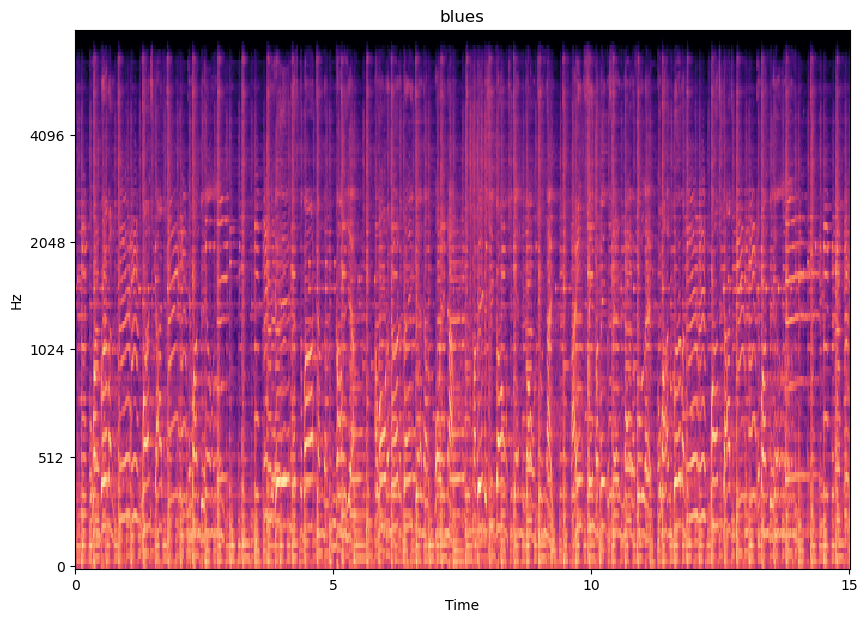

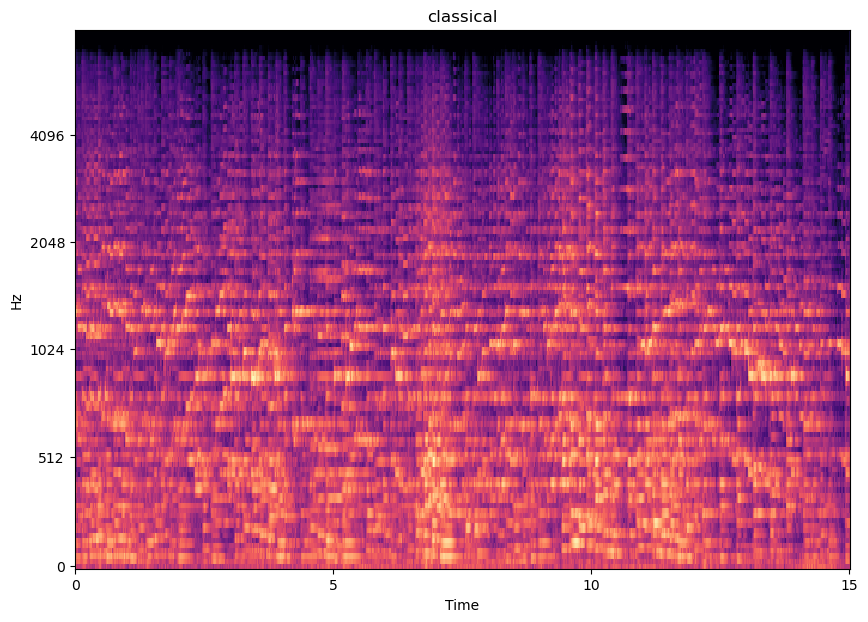

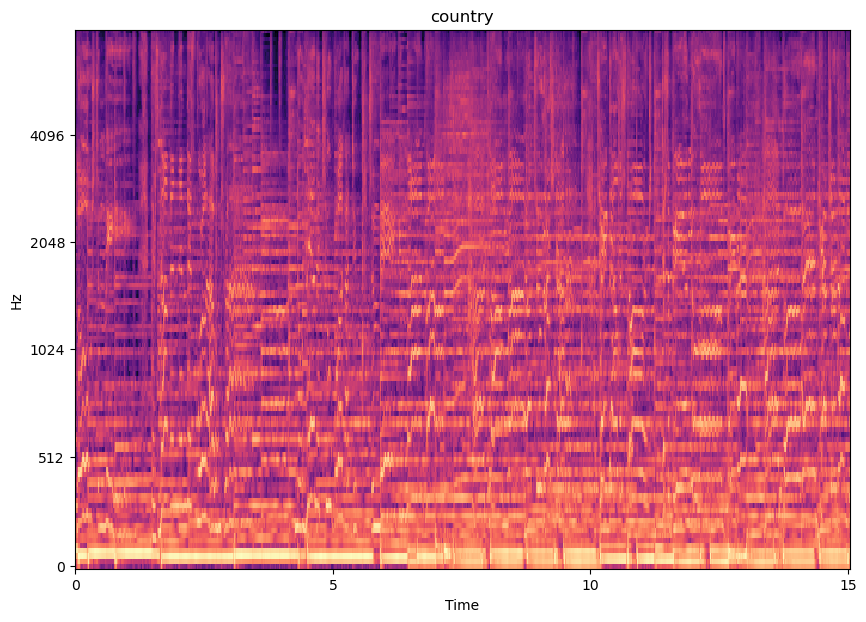

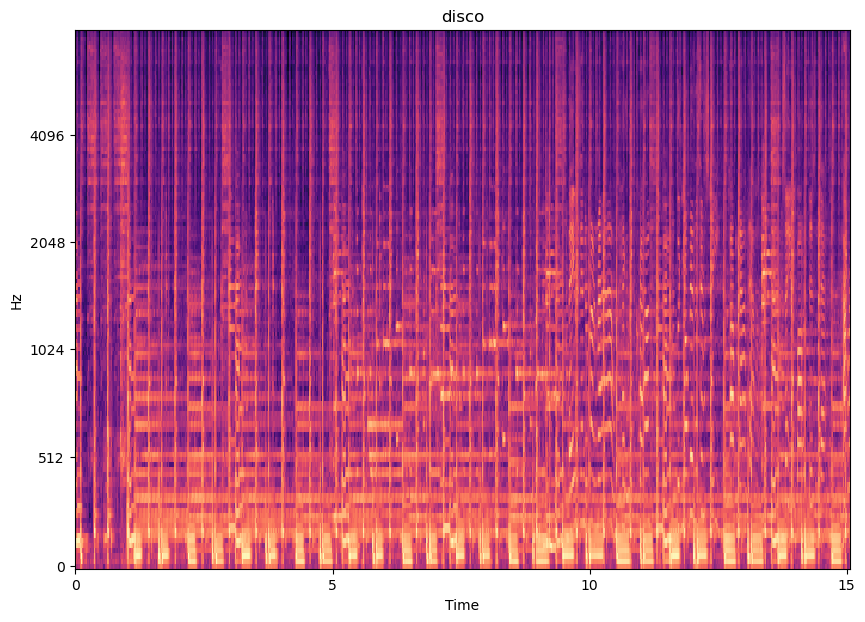

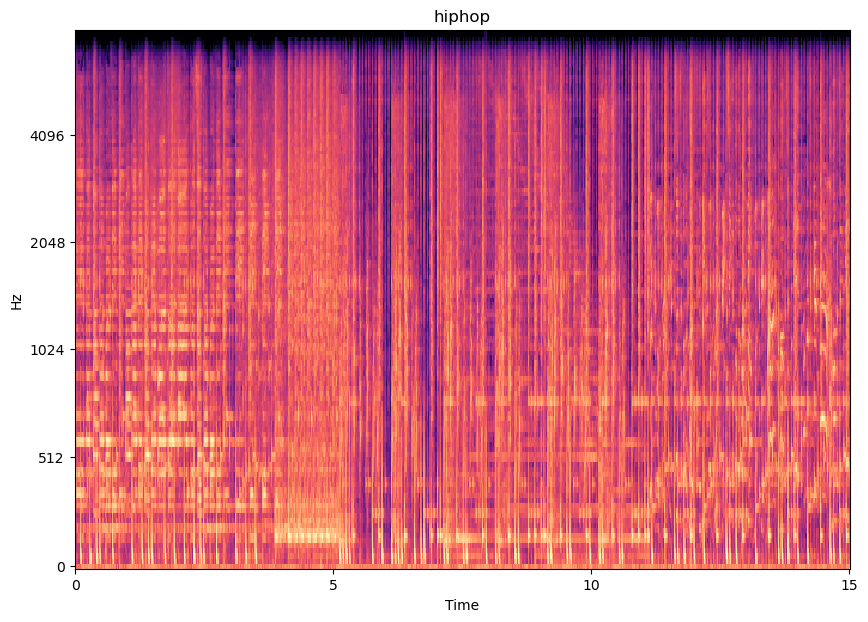

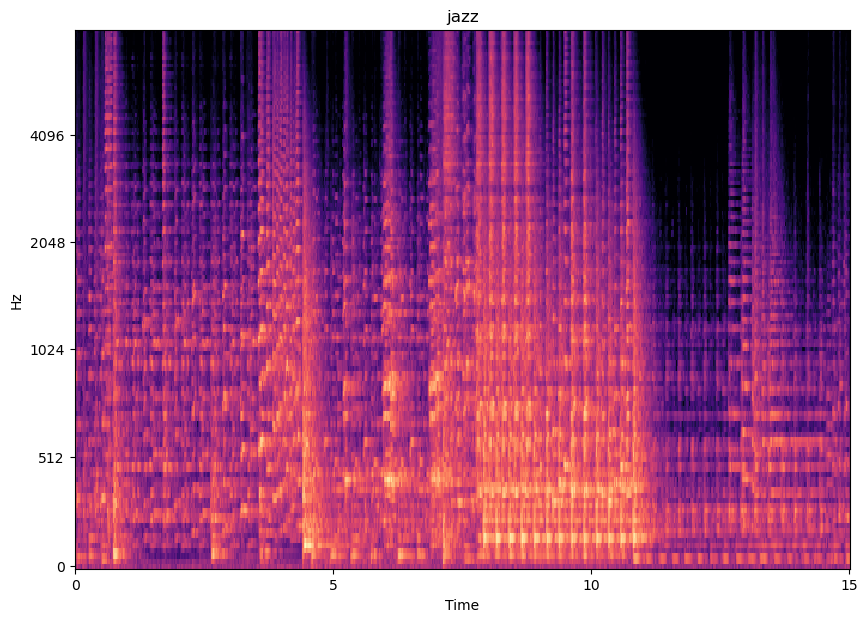

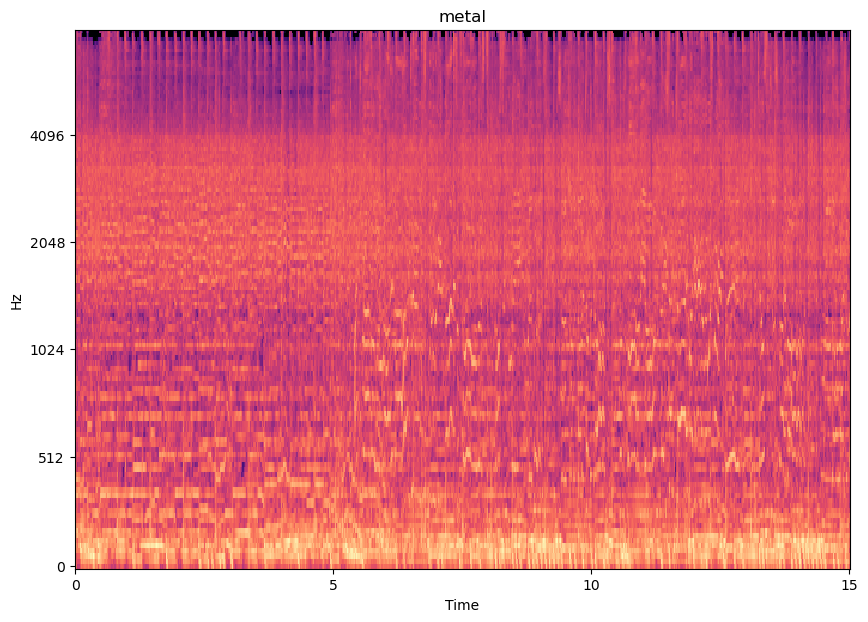

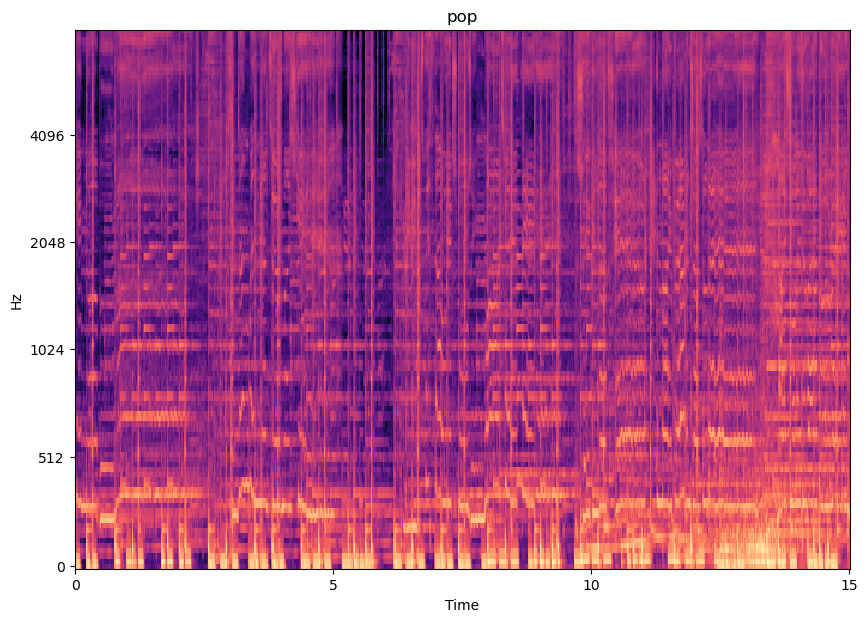

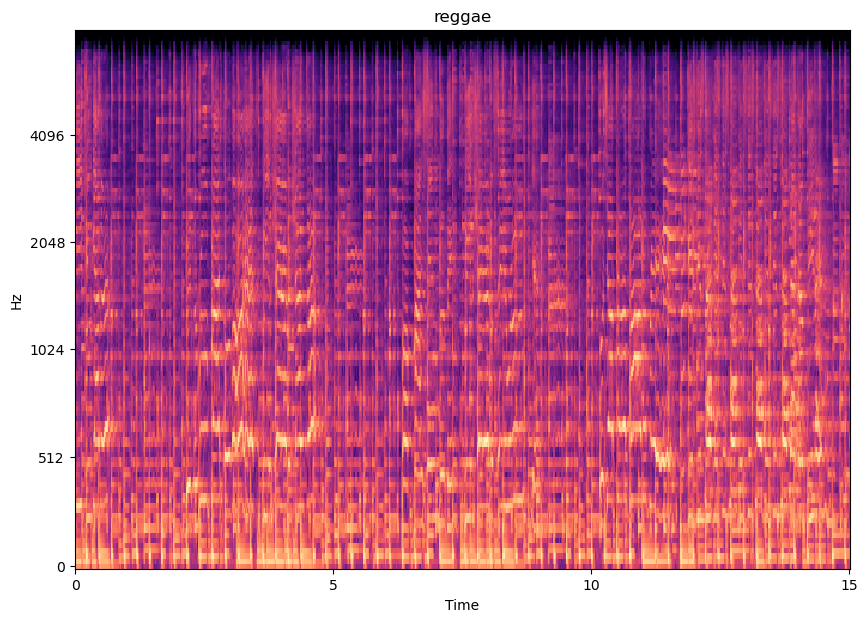

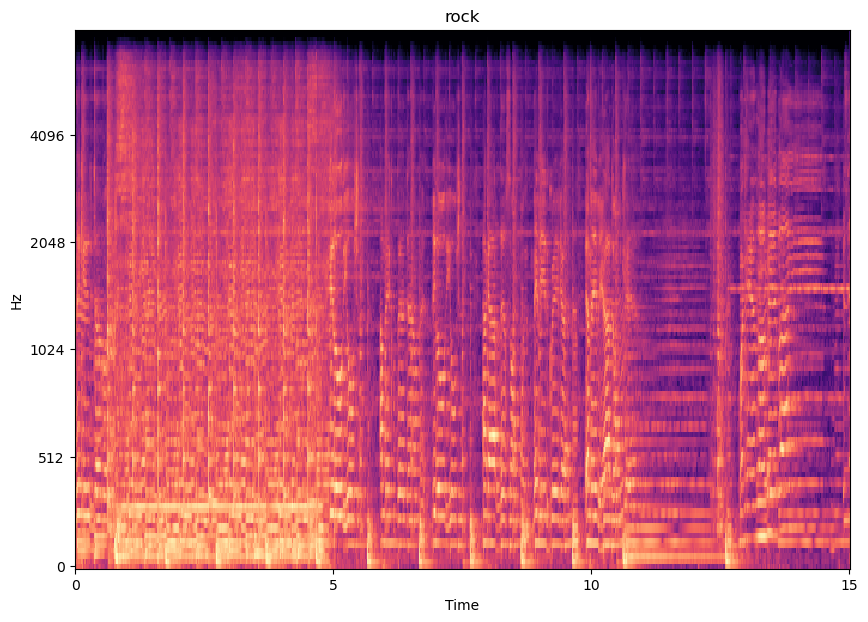

In [7]:

# Plotting spectrogram for each genre
for genre in genres:
    plot_spectrogram(genre)

In [12]:
def spectrogram_subplots(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre in a 5 x 2 grid.
    '''
    
    # Defining the subplots
    fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (25,10))
    ax = ax.ravel() # Turning ax into a matrix to make it easier to work with

    # Looping through the list of genres
    for i, kind in enumerate(genre):
        
        # Reading in the first file from each genre
        y, sr = librosa.core.load(f'../data/genres/audiofiles/{kind}/{kind}.00000.wav')
        
        # Computing the mel spectrogram
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        
        # Displaying the mel spectrogram 
        librosa.display.specshow(spect, y_axis = 'mel', fmax = 8000, x_axis = 'time', ax = ax[i])
        ax[i].set_title(str(kind))

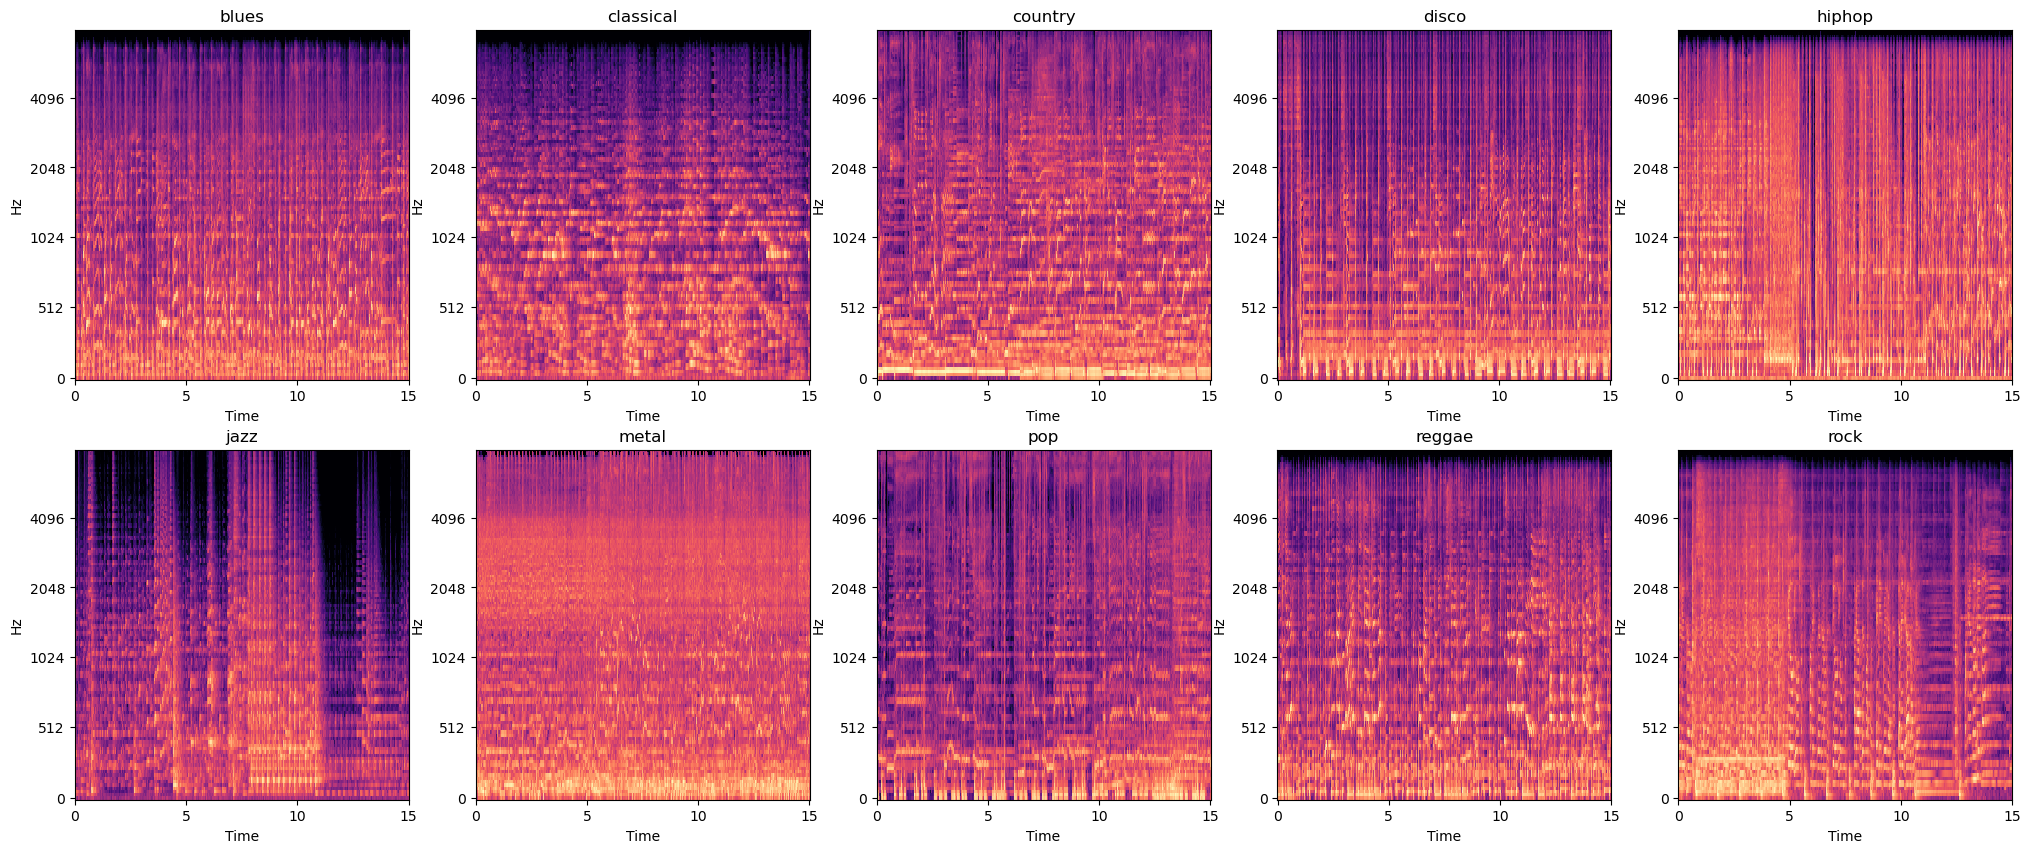

In [13]:
spectrogram_subplots(genres)

## Correlations

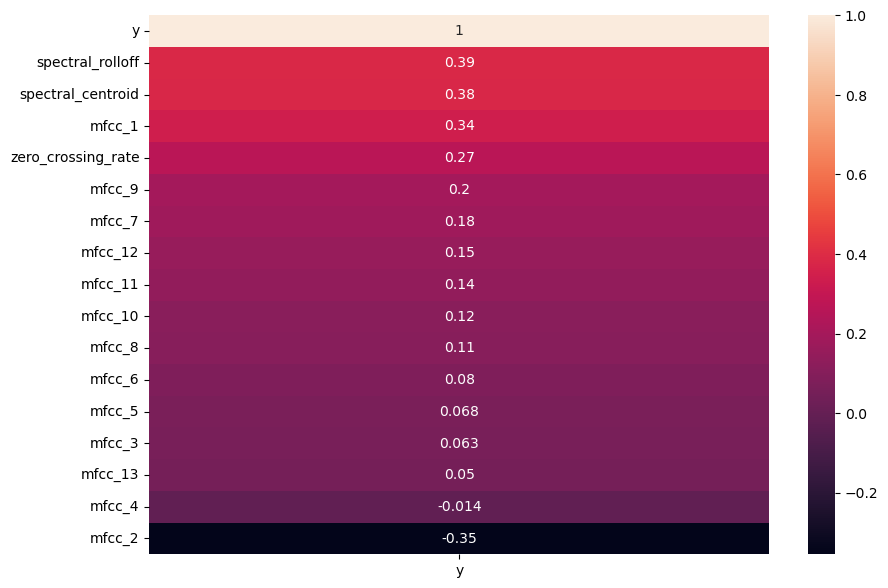

In [16]:
# Checking correlations
plt.figure(figsize=(10,7))
df_1 = df.drop(['files', 'labels'], axis=1)
sns.heatmap(df_1.corr()[['y']].sort_values('y', ascending=False), annot=True);